Successfully loaded both CSV files.
Data preparation and merging complete.


/tmp/ipython-input-3115074189.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['simple_sentiment'] = analysis_df['classification'].apply(simplify_sentiment)



--- Analysis Results ---

Average Profitability by Sentiment:
simple_sentiment
Fear     50.047622
Greed    77.838247
Name: closed_pnl, dtype: float64

Total Trading Volume (USD) by Sentiment:
simple_sentiment
Fear     7.041585e+08
Greed    1.549104e+08
Name: size_usd, dtype: float64

Average Trade Size (USD) by Sentiment:
simple_sentiment
Fear     5259.977837
Greed    3581.661513
Name: size_usd, dtype: float64


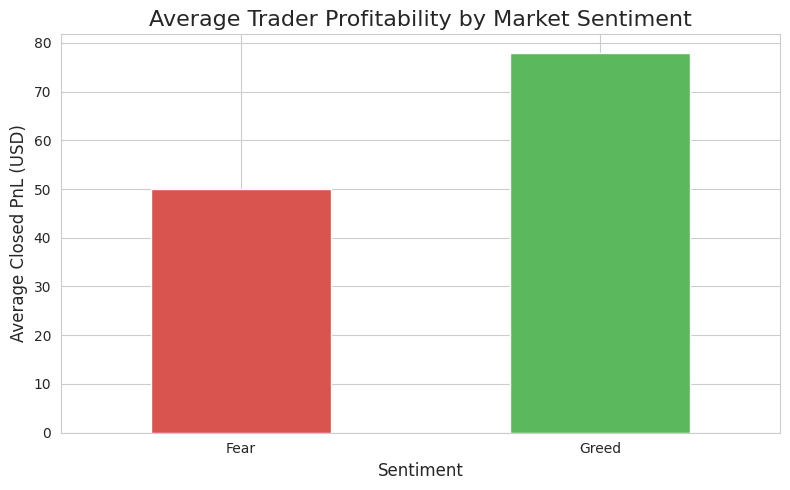

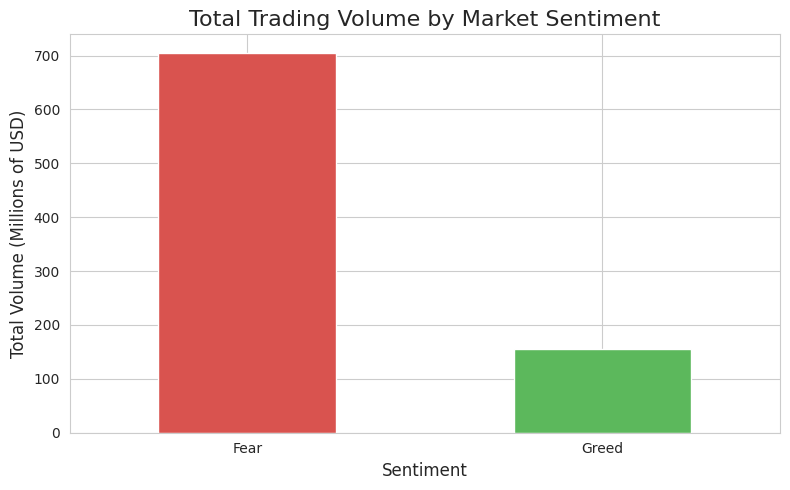

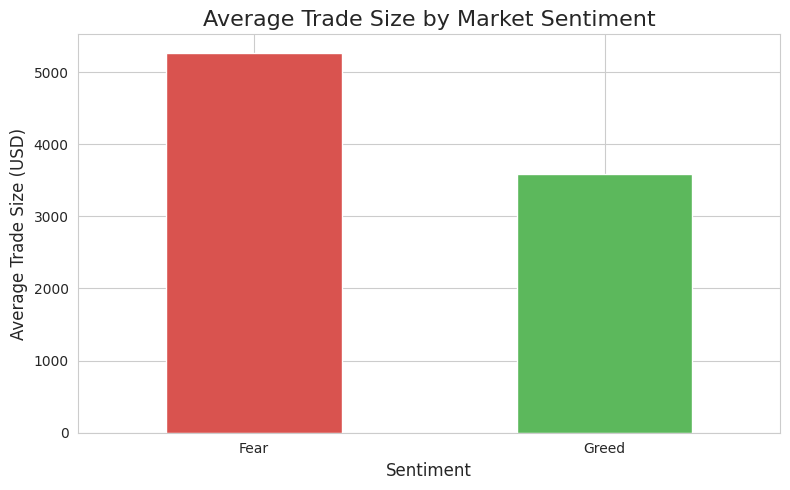


Successfully generated and saved all result plots.


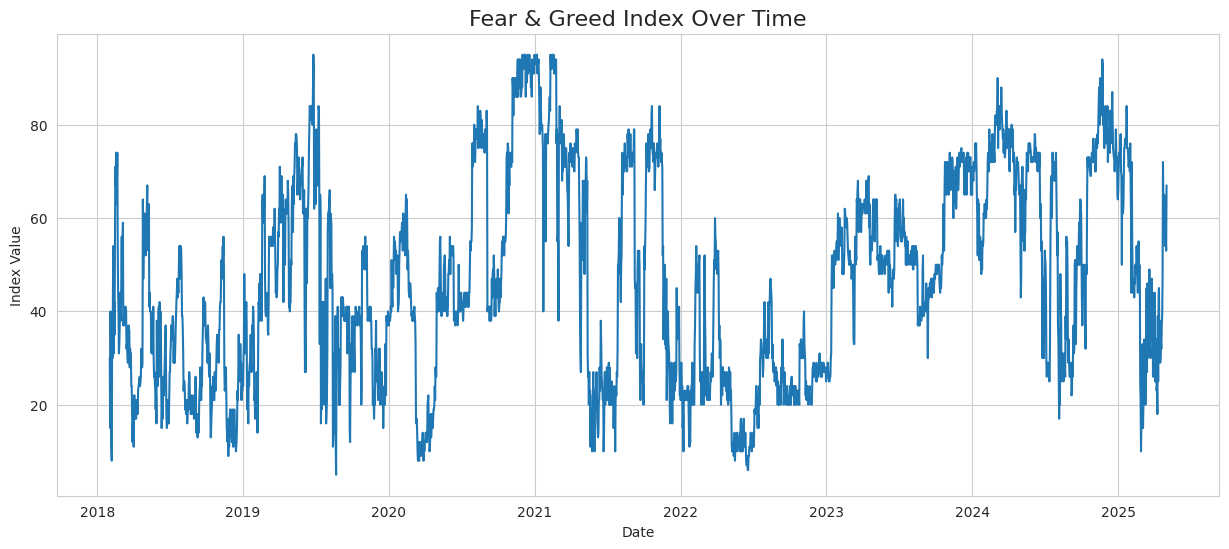

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data ---
# This block loads your two CSV files.
try:
    fear_greed_df = pd.read_csv('fear_greed_index.csv')
    trader_data_df = pd.read_csv('historical_data.csv')
    print("Successfully loaded both CSV files.")
except FileNotFoundError:
    print("Error: Make sure 'fear_greed_index.csv' and 'historical_data.csv' are uploaded to your Colab session or Drive.")
    exit()

# --- 2. Prepare and Merge Data ---
# This block cleans the data and merges the two sources.

# Clean up trader data column names
trader_data_df.columns = trader_data_df.columns.str.replace(' ', '_').str.lower()

# Convert date/time columns to a standard format
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
trader_data_df['datetime'] = pd.to_datetime(trader_data_df['timestamp'], unit='ms')
trader_data_df['date'] = pd.to_datetime(trader_data_df['datetime'].dt.date)

# Merge the two dataframes
merged_df = pd.merge(trader_data_df, fear_greed_df[['date', 'classification']], on='date', how='left')
print("Data preparation and merging complete.")

# --- 3. Analyze the Data ---
# This block simplifies sentiment and calculates the key metrics.

# Drop rows where a sentiment classification could not be found
analysis_df = merged_df.dropna(subset=['classification'])

# Simplify sentiment into 'Fear' and 'Greed' categories
def simplify_sentiment(c):
    if 'Greed' in c:
        return 'Greed'
    if 'Fear' in c:
        return 'Fear'
    return 'Neutral'

analysis_df['simple_sentiment'] = analysis_df['classification'].apply(simplify_sentiment)

# Filter out 'Neutral' days for a direct comparison
analysis_df = analysis_df[analysis_df['simple_sentiment'] != 'Neutral']

# Perform the groupby calculations
profitability = analysis_df.groupby('simple_sentiment')['closed_pnl'].mean()
volume = analysis_df.groupby('simple_sentiment')['size_usd'].sum()
avg_trade_size = analysis_df.groupby('simple_sentiment')['size_usd'].mean()

print("\n--- Analysis Results ---")
print("\nAverage Profitability by Sentiment:")
print(profitability)
print("\nTotal Trading Volume (USD) by Sentiment:")
print(volume)
print("\nAverage Trade Size (USD) by Sentiment:")
print(avg_trade_size)

# --- 4. Visualize the Results ---
# This block creates and saves the bar charts for your report.

sns.set_style("whitegrid")

# Plot for Profitability
plt.figure(figsize=(8, 5))
profitability.plot(kind='bar', color=['#d9534f', '#5cb85c'])
plt.title('Average Trader Profitability by Market Sentiment', fontsize=16)
plt.ylabel('Average Closed PnL (USD)', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('profitability_vs_sentiment.png')
plt.show()

# Plot for Total Trading Volume
plt.figure(figsize=(8, 5))
(volume / 1e6).plot(kind='bar', color=['#d9534f', '#5cb85c'])
plt.title('Total Trading Volume by Market Sentiment', fontsize=16)
plt.ylabel('Total Volume (Millions of USD)', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('volume_vs_sentiment.png')
plt.show()

# Plot for Average Trade Size
plt.figure(figsize=(8, 5))
avg_trade_size.plot(kind='bar', color=['#d9534f', '#5cb85c'])
plt.title('Average Trade Size by Market Sentiment', fontsize=16)
plt.ylabel('Average Trade Size (USD)', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('tradesize_vs_sentiment.png')
plt.show()

print("\nSuccessfully generated and saved all result plots.")

# Add this to your notebook
plt.figure(figsize=(15, 6))
# Assuming 'fear_greed_df' is your original sentiment dataframe
plt.plot(fear_greed_df['date'], fear_greed_df['value'])
plt.title('Fear & Greed Index Over Time', fontsize=16)
plt.ylabel('Index Value')
plt.xlabel('Date')
plt.show()